### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import os

In [ ]:
# Ensure output directory exists
os.makedirs("images", exist_ok=True)
os.makedirs("plots", exist_ok=True)

# Problems

Use the prompts below to get started with your data analysis.  

# 1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head(10)

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   
5  No Urgent Place  Friend(s)   Sunny           80   6PM   
6  No Urgent Place  Friend(s)   Sunny           55   2PM   
7  No Urgent Place     Kid(s)   Sunny           80  10AM   
8  No Urgent Place     Kid(s)   Sunny           80  10AM   
9  No Urgent Place     Kid(s)   Sunny           80  10AM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   
5        Restaurant(<20)         2h  Female  21  Unmarried partner  ...   
6  Carry out & Take away         1d  Female  21  Unmarried partner  ...   
7        Restaurant(<20)         2h  Female  21  Unmarried partner  ...   
8  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
9                    Bar         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   
5        never       NaN                  4~8              1~3   
6        never       NaN                  4~8              1~3   
7        never       NaN                  4~8              1~3   
8        never       NaN                  4~8              1~3   
9        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   
5                1                 1                 0              0   
6                1                 1                 0              0   
7                1                 1                 0              0   
8                1                 1                 0              0   
9                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  
5             1  1  
6             1  1  
7             1  1  
8             1  1  
9             1  0  

[10 rows x 26 columns]

# 2. Investigate the dataset for missing or problematic data.

Identify the data volume using `shape` attribute of the dataframe.



In [7]:
print("Data frame rows and columns in order: ", data.shape)

Data frame rows and columns in order:  (12684, 26)


Count the number of missing values in each columns of dataframe. Print counts in reverse order of missing values.

In [8]:
data.isna().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

**Observation**: The number of missing values for `car` column is significantly higher compared to count of missing values for other columns.  

Let's plot the count of missing values in the dataframe to visualize the same.

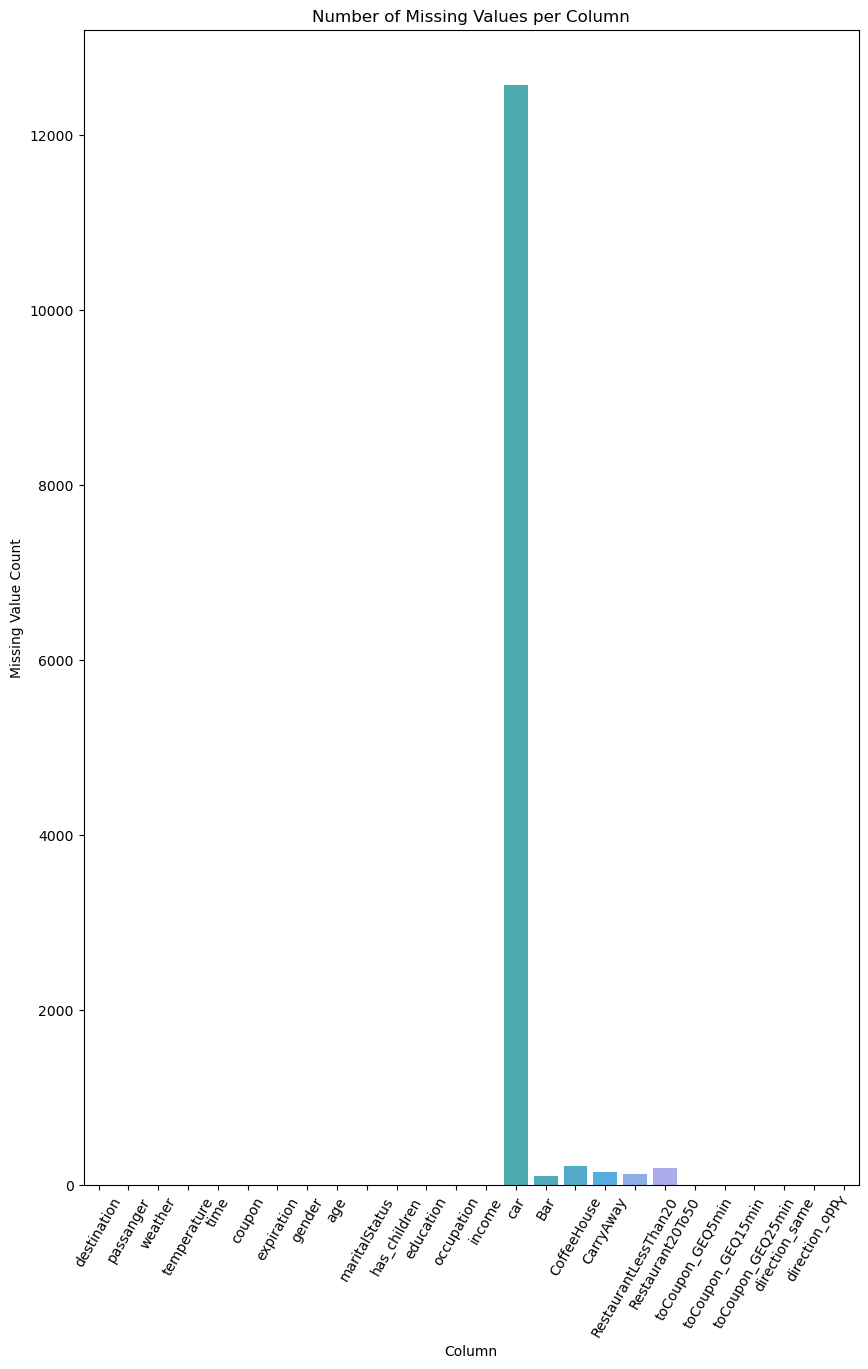

In [9]:
missing_counts = data.isnull().sum()
plt.figure(figsize=(10, 15))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=60)
plt.title('Number of Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Missing Value Count')
plt.savefig('images/missing_values.png')
plt.show()

Identify types of values in each column in the dataframe

In [10]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

Print unique values for columns with datatype object

In [11]:
object_columns = data.select_dtypes(include='object')
for col_name in object_columns.columns:
  print(f"Column: {col_name}")
  print(f"Unique values: {data[col_name].unique()}")
  print()

Column: destination
Unique values: ['No Urgent Place' 'Home' 'Work']

Column: passanger
Unique values: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Column: weather
Unique values: ['Sunny' 'Rainy' 'Snowy']

Column: time
Unique values: ['2PM' '10AM' '6PM' '7AM' '10PM']

Column: coupon
Unique values: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

Column: expiration
Unique values: ['1d' '2h']

Column: gender
Unique values: ['Female' 'Male']

Column: age
Unique values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Column: maritalStatus
Unique values: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

Column: education
Unique values: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

Column: occupation
Unique values: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthc

# 3. Decide what to do about your missing data -- drop, replace, other...

Observations:

1. The column name Y is not intuitive for analysis. Lets rename Y column to coupon_accepted.
2. The number of values missing the car column is too high to be relevant in decision making based on values that column. Lets drop the car column.
3. Fill the missing values with mode. **Reason for choosing mode:** The values in these object columns are range values. So, identifying mean or median might mean identifying mid point of range and populate those values in a new column and fill the missing values with mean of new column values. It is not intuitive. More importantly, the count of missing values is not significant. So, mode is better alternative with an assumption that the highest tendency of visits e.g. Bar visits would be applicable in the missing case too.









**Rename Column**

In [12]:
data.rename(columns={'Y':'coupon_accepted'}, inplace=True)
print(f"Columns: {data.columns}")

Columns: Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'coupon_accepted'],
      dtype='object')


**Drop `car` column**

In [13]:
data.drop(columns=['car'], inplace=True)
print(f"Columns: {data.columns}")

Columns: Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'coupon_accepted'],
      dtype='object')


**Fill the missing values with mode of the colum**

In [14]:
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])

Lets confirm that there is no column (except dropped one `Car`) has any missing values.

In [15]:
data.isna().sum().sort_values(ascending=False)

destination             0
income                  0
direction_opp           0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
occupation              0
passanger               0
education               0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
coupon_accepted         0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [16]:
total_accepted_count = data['coupon_accepted'].value_counts()[1]
total_count = data['coupon_accepted'].count()
print(f"Total accepted: {total_accepted_count}")
print(f"Total count: {total_count}")
print(f"Proportion of total observations that accepted the coupon: {total_accepted_count/total_count}")

Total accepted: 7210
Total count: 12684
Proportion of total observations that accepted the coupon: 0.5684326710816777


Plot a pie chart based on coupon_accepted column values: accepted (1) and rejected (0).

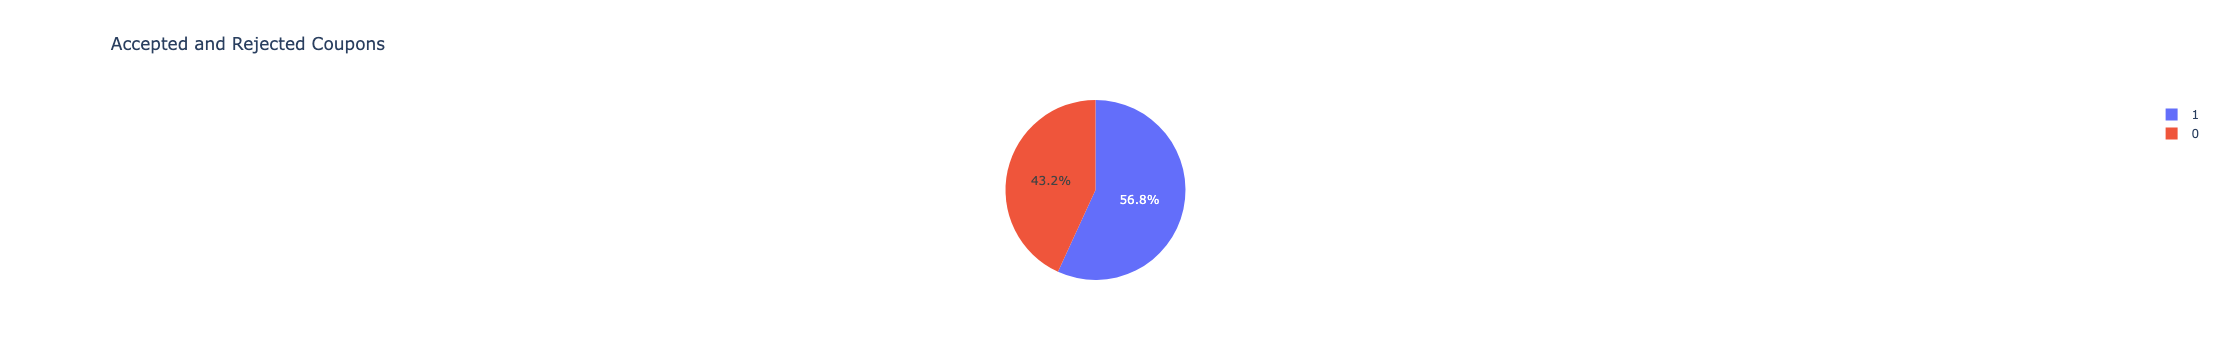

In [17]:
fig = px.pie(data, names='coupon_accepted', title='Accepted and Rejected Coupons')
fig.write_html("plots/accpted_rejected_proportion.html")
fig.show()

5. Use a bar plot to visualize the `coupon` column.

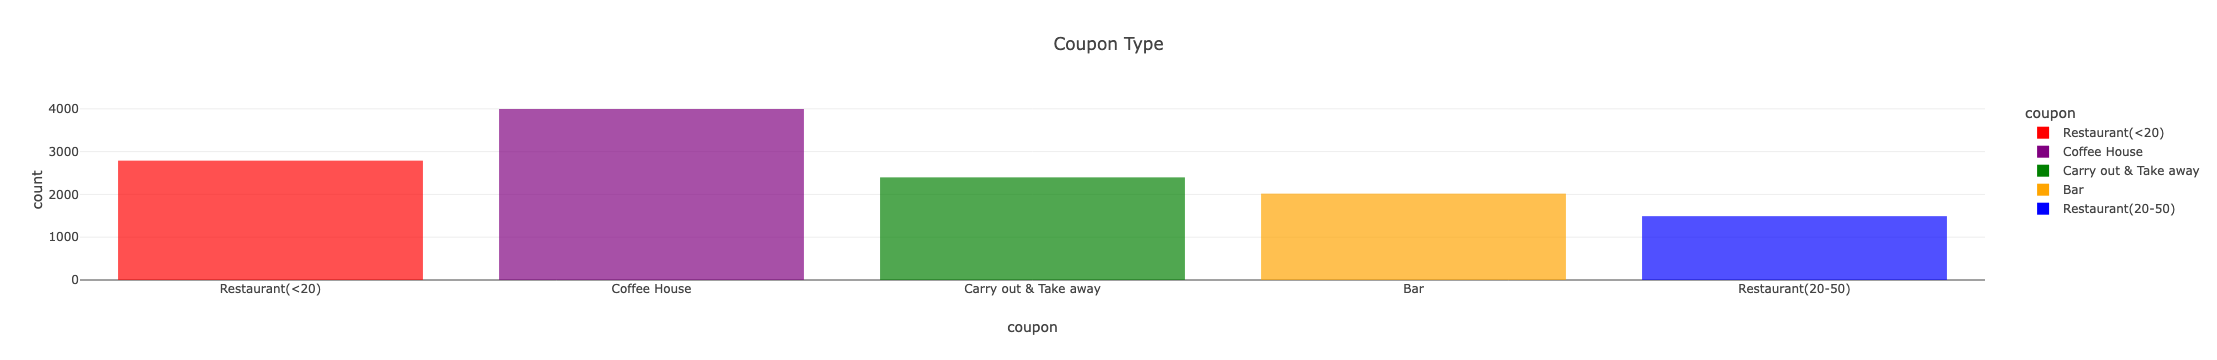

In [18]:
colors = {
    'Restaurant(<20)': '#FF0000',  # red
    'Coffee House': '#800080',    # purple
    'Carry out & Take away': '#008000',  # green
    'Bar': '#FFA500',             # orange
    'Restaurant(20-50)': '#0000FF'  # blue
}
fig = px.bar(
    data,
    x='coupon',
    color='coupon',
    title='Coupon Type',
    color_discrete_map=colors,
    template='none'
)
fig.update_traces(opacity=1)
fig.write_html("plots/coupon_bar_plot.html")
fig.show()

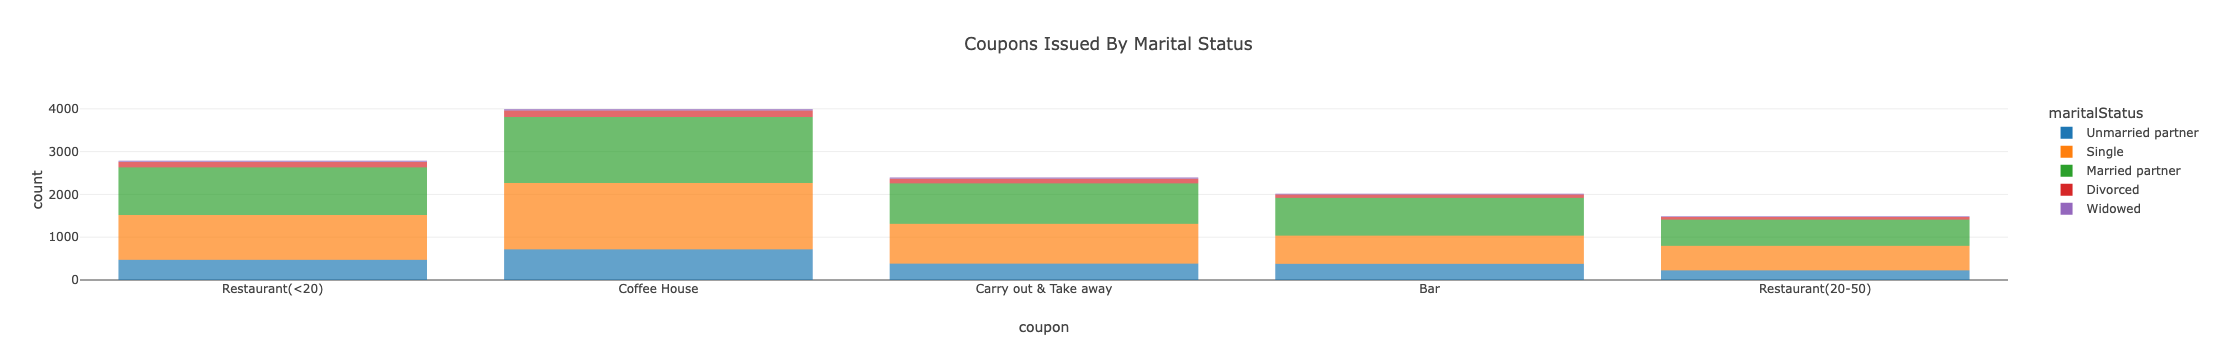

In [19]:
fig = px.bar(
    data,
    x='coupon',
    color='maritalStatus',
    title='Coupons Issued By Marital Status',
    template='none'
)
fig.update_traces(opacity=1)
fig.write_html("plots/coupons_issued_by_marital_status.html")
fig.show()

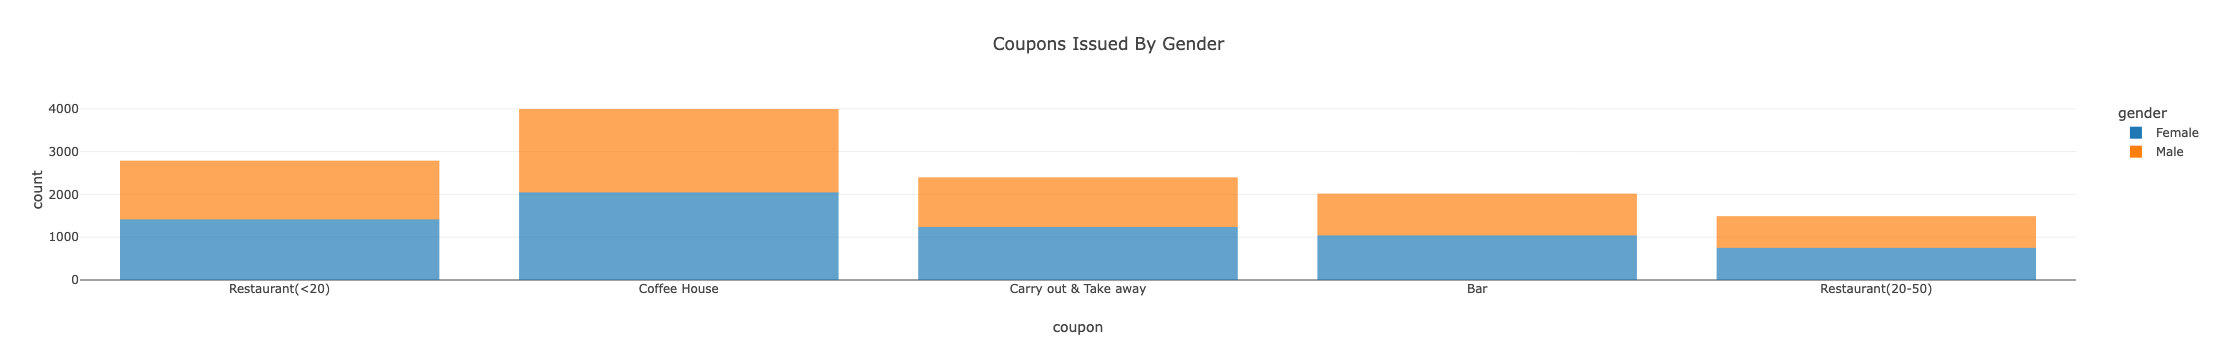

In [20]:
fig = px.bar(
    data,
    x='coupon',
    color='gender',
    title='Coupons Issued By Gender',
    template='none'
)
fig.update_traces(opacity=1)
fig.write_html("plots/coupons_issued_by_gender.html")
fig.show()

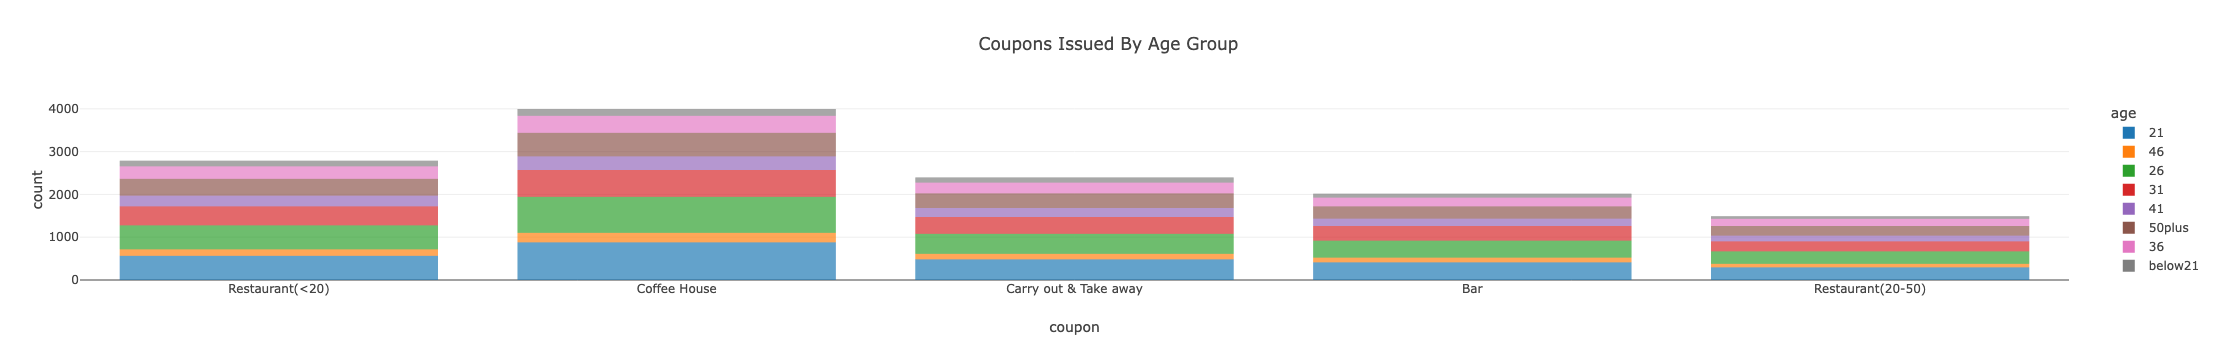

In [21]:
fig = px.bar(
    data,
    x='coupon',
    color='age',
    title='Coupons Issued By Age Group',
    template='none'
)
fig.update_traces(opacity=1)
fig.write_html("plots/coupons_issued_by_age_group.html")
fig.show()

6. Use a histogram to visualize the temperature column.

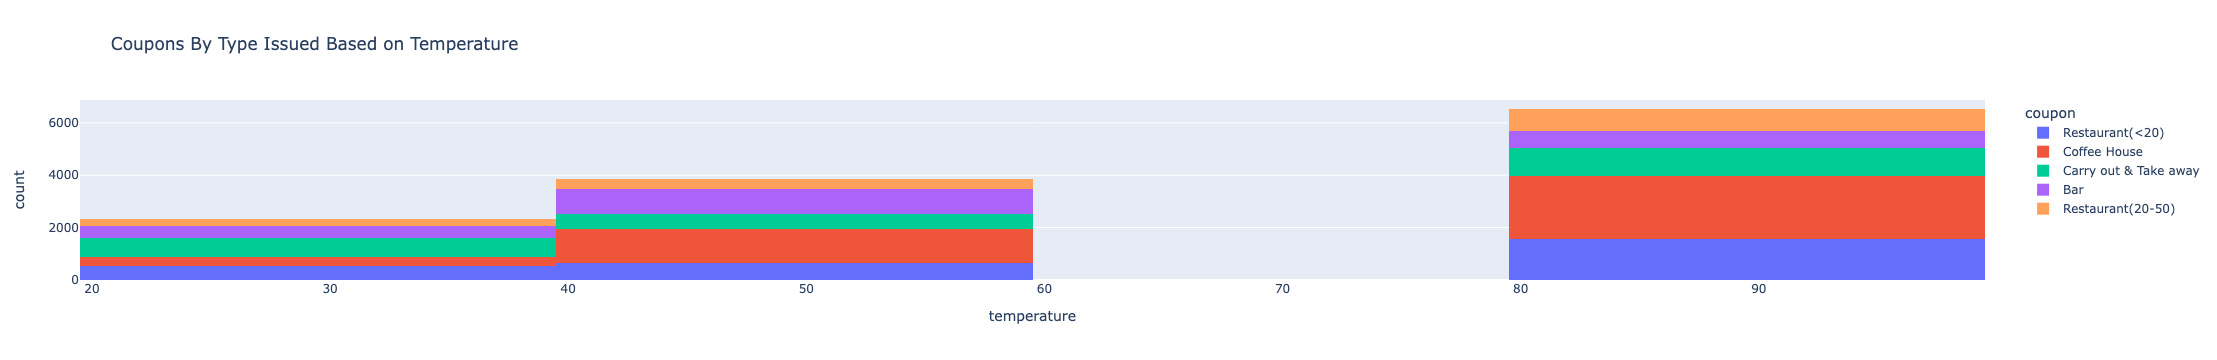

In [22]:
fig = px.histogram(data, x='temperature', color='coupon', title="Coupons By Type Issued Based on Temperature")
fig.write_html("plots/coupons_by_type_by_temperature.html")
fig.show()

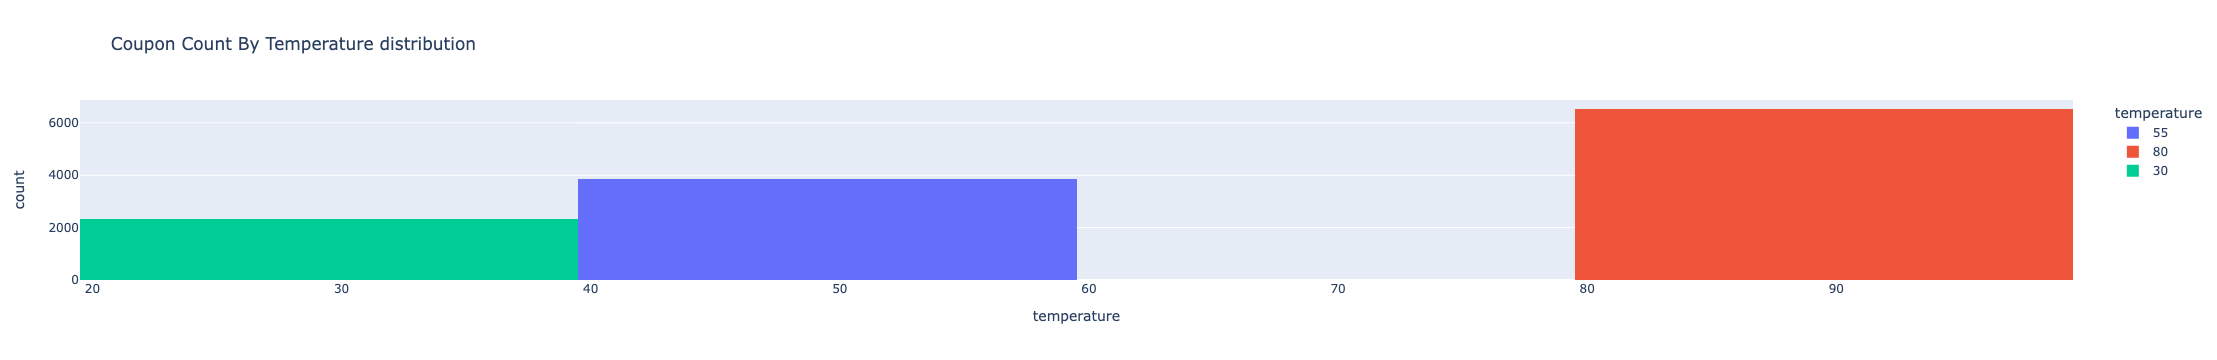

In [23]:
fig = px.histogram(data, x='temperature', color='temperature', title="Coupon Count By Temperature distribution")
fig.write_html("plots/coupons_count_by_temperature.html")
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
bar_coupons = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


Total accepted: 827
Total count: 2017
Proportion of total bar coupons that were accepted: 0.41001487357461575


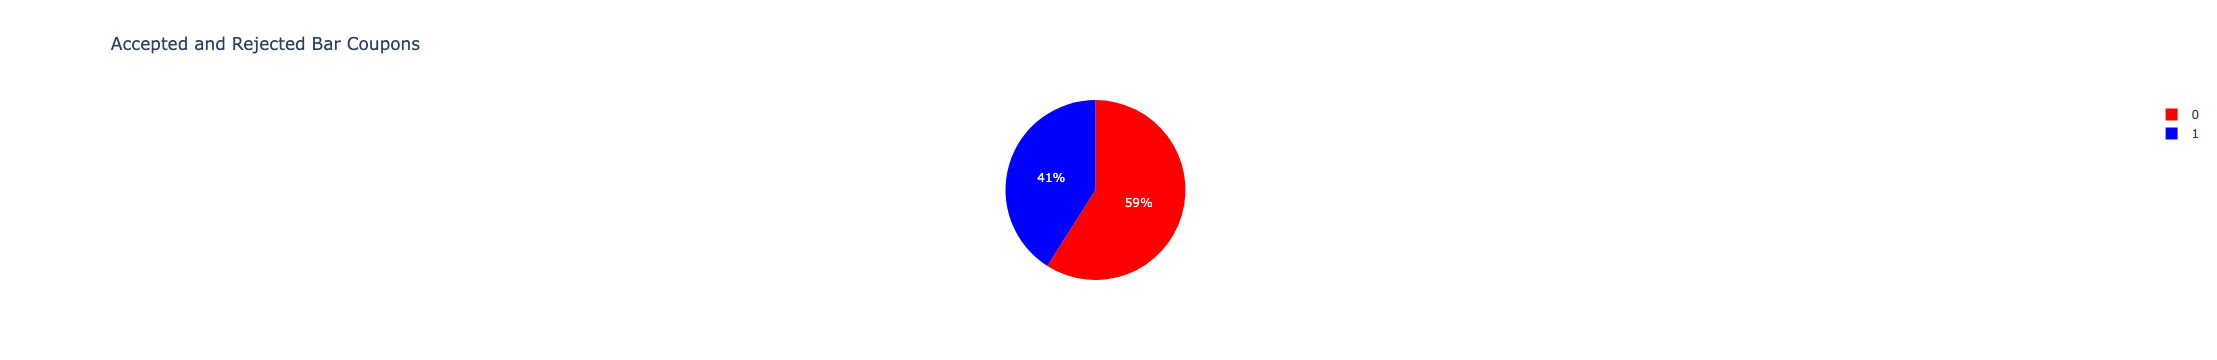

In [25]:
bar_coupons_total_accepted_count = bar_coupons['coupon_accepted'].value_counts()[1]
bar_coupons_total_count = bar_coupons['coupon_accepted'].count()
color_map = {
    0: 'red',
    1: 'blue'
}
print(f"Total accepted: {bar_coupons_total_accepted_count}")
print(f"Total count: {bar_coupons_total_count}")
print(f"Proportion of total bar coupons that were accepted: {bar_coupons_total_accepted_count/bar_coupons_total_count}")
fig = px.pie(
    bar_coupons,
    names='coupon_accepted',
    title='Accepted and Rejected Bar Coupons',
    color='coupon_accepted',
    color_discrete_map=color_map
)
fig.write_html("plots/accepted_rejected_bar_coupons_proportion.html")
fig.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


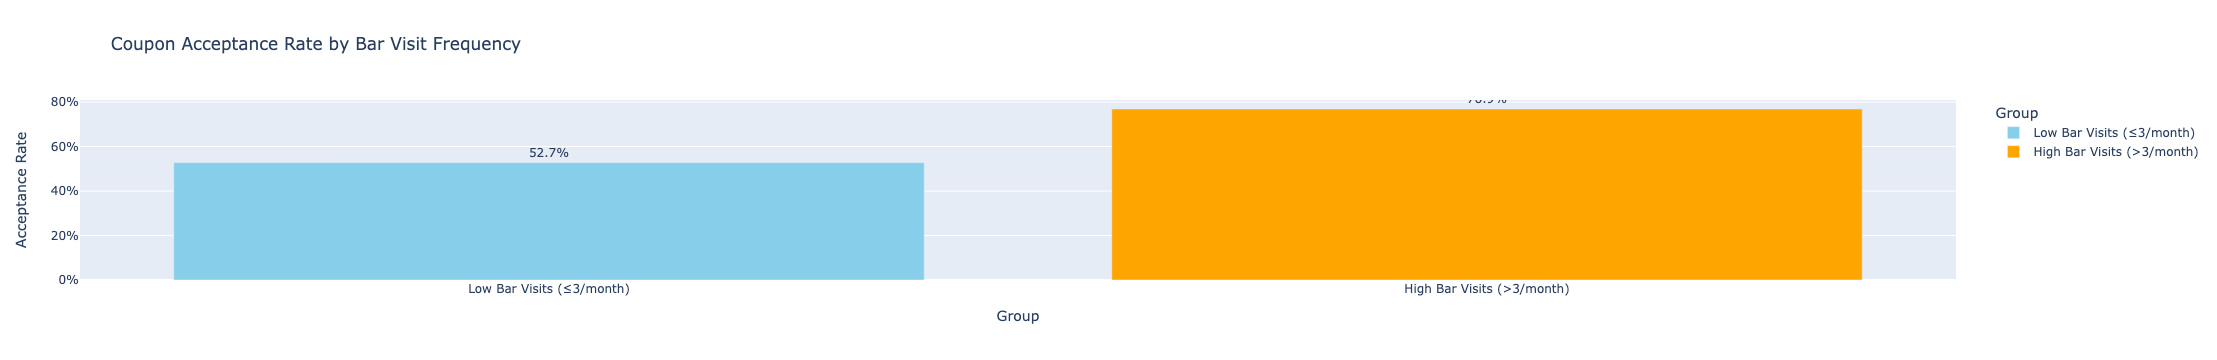

In [26]:
# Define criteria and identify groups
less_than_3_visits = ['less1', '1~3']
more_than_3_visits = ['4~8', 'gt8']
less_than_3_group = bar_coupons.query('Bar in @less_than_3_visits')
more_than_3_group = bar_coupons.query('Bar in @more_than_3_visits')

# Compute acceptance rates
less_than_3_acceptance_rate = less_than_3_group['coupon_accepted'].mean()
more_than_3_acceptance_rate = more_than_3_group['coupon_accepted'].mean()

# Prepare DataFrame for plotting
plot_df = pd.DataFrame({
    'Group': ['Low Bar Visits (≤3/month)', 'High Bar Visits (>3/month)'],
    'Acceptance Rate': [less_than_3_acceptance_rate, more_than_3_acceptance_rate]
})

# Plot
fig = px.bar(
    plot_df,
    x='Group',
    y='Acceptance Rate',
    title='Coupon Acceptance Rate by Bar Visit Frequency',
    color='Group',
    color_discrete_map={
        'Low Bar Visits (≤3/month)': 'skyblue',
        'High Bar Visits (>3/month)': 'orange'
    },
    text='Acceptance Rate'
)

# Make it look nice
fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_layout(yaxis_tickformat='.0%', yaxis_title='Acceptance Rate')
fig.write_html("plots/coupon_acceptance_by_bar_visits_frequency.html")
fig.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


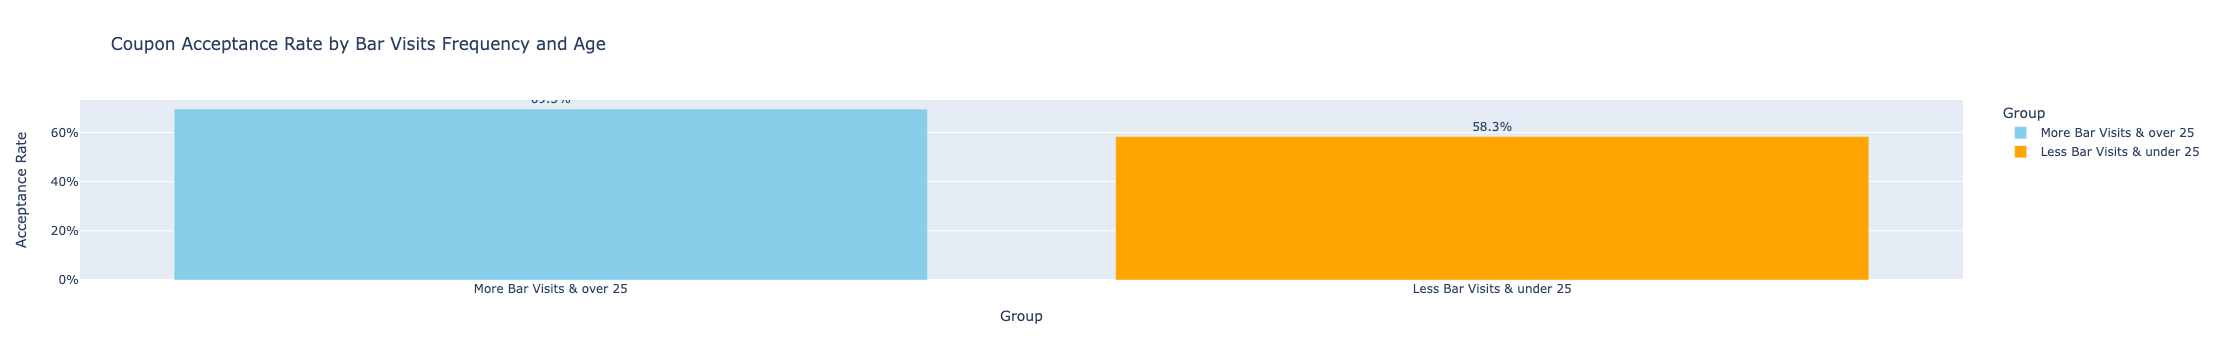

In [27]:
# Define criteria and identify groups
more_than_1_visits = ['1~3', '4~8', 'gt8']
age_over_25 = ['26', '31', '50plus', '36', '41', '46']
less_than_1_visits = ['less1']
age_under_25 = ['below21', '21']
visits_more_than_1_age_over_25_group = bar_coupons.query('Bar in @more_than_1_visits and age in @age_over_25')
visits_less_than_1_age_under_25_group = bar_coupons.query('Bar in @less_than_1_visits and age in @age_under_25')

# Compute acceptance rates
visits_more_than_1_age_over_25_acceptance_rate = visits_more_than_1_age_over_25_group['coupon_accepted'].mean()
visits_less_than_1_age_under_25_acceptance_rate = visits_less_than_1_age_under_25_group['coupon_accepted'].mean()

# Prepare DataFrame for plotting
plot_df = pd.DataFrame({
    'Group': ['More Bar Visits & over 25', 'Less Bar Visits & under 25'],
    'Acceptance Rate': [visits_more_than_1_age_over_25_acceptance_rate, visits_less_than_1_age_under_25_acceptance_rate]
})

# Plot
fig = px.bar(
    plot_df,
    x='Group',
    y='Acceptance Rate',
    title='Coupon Acceptance Rate by Bar Visits Frequency and Age',
    color='Group',
    color_discrete_map={
        'More Bar Visits & over 25': 'skyblue',
        'Less Bar Visits & under 25': 'orange'
    },
    text='Acceptance Rate'
)

# Make it look nice
fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_layout(yaxis_tickformat='.0%', yaxis_title='Acceptance Rate')
fig.write_html("plots/coupon_acceptance_by_bar_visits_frequency_and_age.html")
fig.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


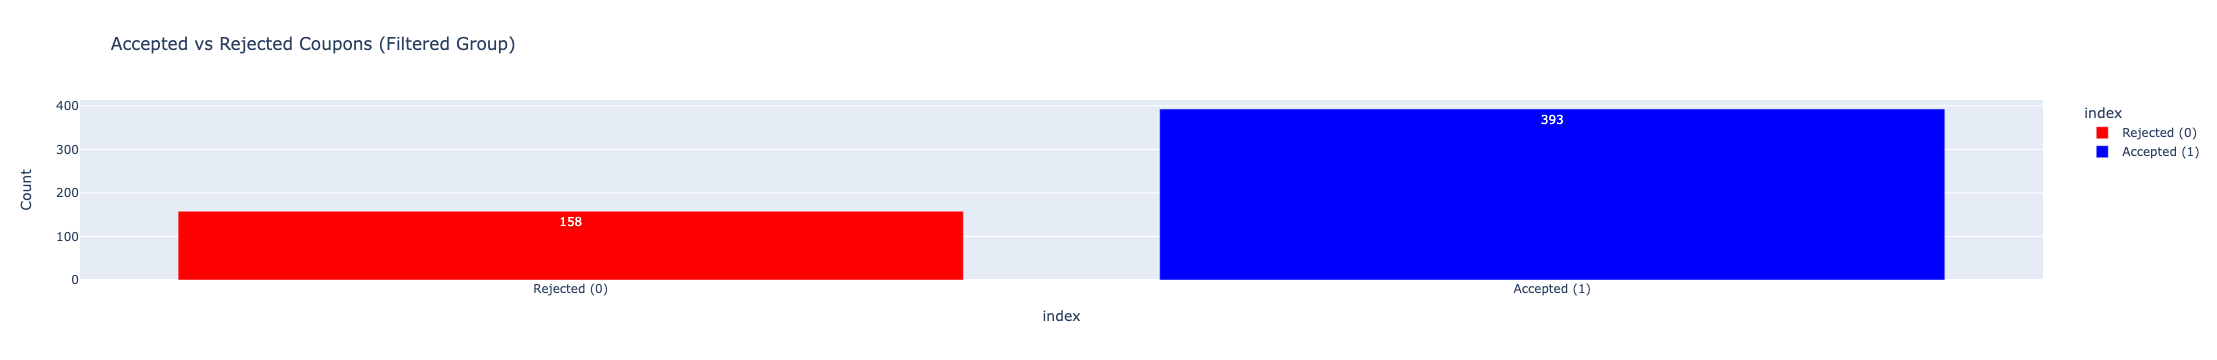

In [28]:
# Define criteria and identify groups
more_than_1_visits = ['1~3', '4~8', 'gt8']

# 2. Filter based on all three conditions
filtered_df = bar_coupons.query(
    "Bar in @more_than_1_visits and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'"
)

# 3. Count accepted vs rejected
acceptance_counts = filtered_df['coupon_accepted'].value_counts().sort_index()
# Define labels
acceptance_counts.index = ['Rejected (0)', 'Accepted (1)']

# 4. Create bar plot
fig = px.bar(
    acceptance_counts,
    x=acceptance_counts.index,
    y=acceptance_counts.values,
    labels={'x': 'Coupon Response', 'y': 'Count'},
    title='Accepted vs Rejected Coupons (Filtered Group)',
    color=acceptance_counts.index,
    color_discrete_map={
        'Accepted (1)': 'blue',
        'Rejected (0)': 'red'
    },
    text=acceptance_counts.values
)
fig.write_html("plots/coupon_acceptance_by_visits_passanger_and_occupation_filter.html")
fig.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Acceptance Rate: 58.89%


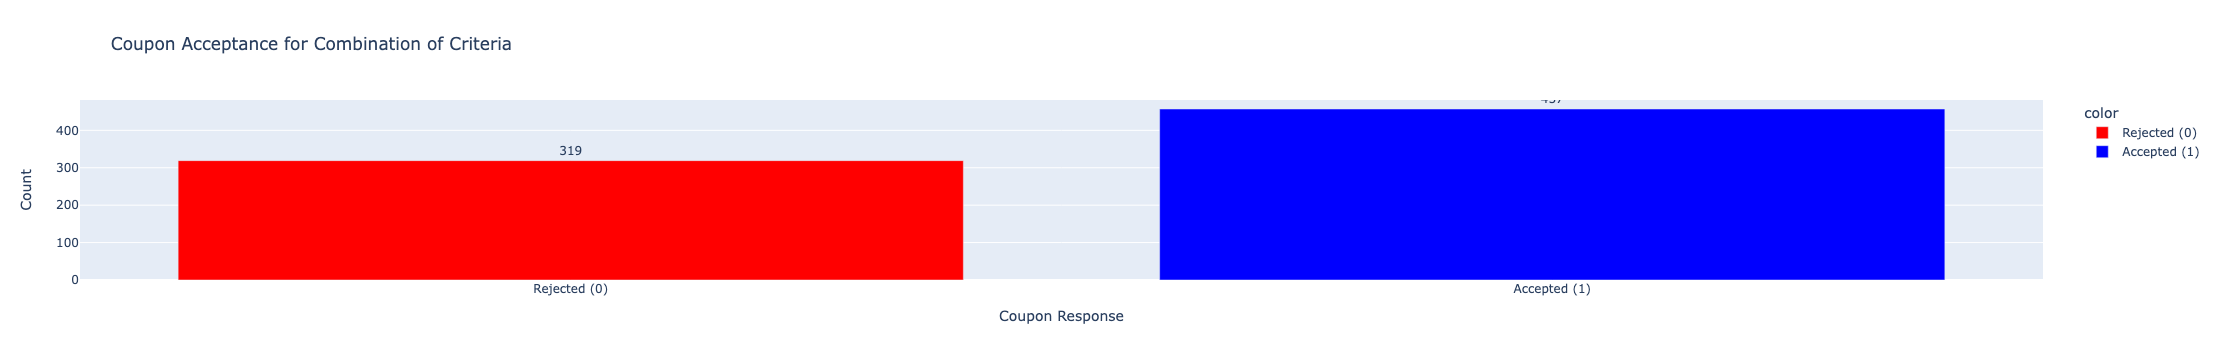

In [29]:
more_than_1_visits = ['1~3', '4~8', 'gt8']
freq_at_cheap_restaurants = ['4~8', 'gt8']
less_than_50k_income_values = ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']
age_under_30 = ['below21', '21', '26']

first_condition = (
    (bar_coupons['Bar'].isin(more_than_1_visits)) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
)

second_condition = (
    (bar_coupons['Bar'].isin(more_than_1_visits)) &
    (bar_coupons['age'].isin(age_under_30))
)

third_condition = (
    (bar_coupons['RestaurantLessThan20'].isin(freq_at_cheap_restaurants)) &
    (bar_coupons['income'].isin(less_than_50k_income_values))
)

# Combine all with OR
combined_condition = first_condition | second_condition | third_condition

# Apply the combined condition to filter the DataFrame
filtered_bar_coupons_df = bar_coupons[combined_condition]

# Calculate acceptance rate
acceptance_rate = filtered_bar_coupons_df['coupon_accepted'].mean()
print(f"Acceptance Rate: {acceptance_rate:.2%}")

# Count values
counts = filtered_bar_coupons_df['coupon_accepted'].value_counts().sort_index()
counts.index = ['Rejected (0)', 'Accepted (1)']

colors_map = {
    'Accepted (1)': 'blue',
    'Rejected (0)': 'red'
    }

# Bar plot
fig = px.bar(
    x=counts.index,
    y=counts.values,
    color=counts.index,
    text=counts.values,
    title="Coupon Acceptance for Combination of Criteria",
    labels={'x': 'Coupon Response', 'y': 'Count'},
    color_discrete_map=colors_map
)
fig.update_traces(textposition='outside')
fig.write_html("plots/coupon_acceptance_by_combining_criteria.html")
fig.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Hypothesis about offering bar coupons**
There is higher correlation between drivers accepting coupons and their visits count. Specifically, the coupon acceptance is higher in drivers who visit frequently and are travelling with kids passangers.

The other segments of drivers do accept coupons as well. The basic distribution of accepted coupons to rejected ones hints at driver's tendency to accept coupons. In my understanding, the coupons should continue to be offered to incentivize the drivers to visit bars more often.  

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new `DataFrame` that contains just the `Carry out & Take away` coupons.

In [30]:
carryaway_coupons = data[data['coupon'] == 'Carry out & Take away']
carryaway_coupons.head()

destination  passanger weather  temperature  time  \
2   No Urgent Place  Friend(s)   Sunny           80  10AM   
6   No Urgent Place  Friend(s)   Sunny           55   2PM   
8   No Urgent Place     Kid(s)   Sunny           80  10AM   
19             Work      Alone   Sunny           80   7AM   
25  No Urgent Place  Friend(s)   Sunny           80  10AM   

                   coupon expiration  gender age      maritalStatus  ...  \
2   Carry out & Take away         2h  Female  21  Unmarried partner  ...   
6   Carry out & Take away         1d  Female  21  Unmarried partner  ...   
8   Carry out & Take away         2h  Female  21  Unmarried partner  ...   
19  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
25  Carry out & Take away         2h    Male  21             Single  ...   

    CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
2         never       1~3                  4~8              1~3   
6         never       1~3                  4~8              1~3   
8         never       1~3                  4~8              1~3   
19        never       1~3                  4~8              1~3   
25        less1       4~8                  4~8            less1   

   toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
2                 1                 1                 0              0   
6                 1                 1                 0              0   
8                 1                 1                 0              0   
19                1                 0                 0              1   
25                1                 1                 0              0   

   direction_opp  coupon_accepted  
2              1                1  
6              1                1  
8              1                1  
19             0                1  
25             1                0  

[5 rows x 25 columns]

2. What proportion of CarryAway coupons were acccepted?

Total accepted: 1760
Total count: 2393
Proportion of total CarryAway coupons that were accepted: 0.7354784788967823


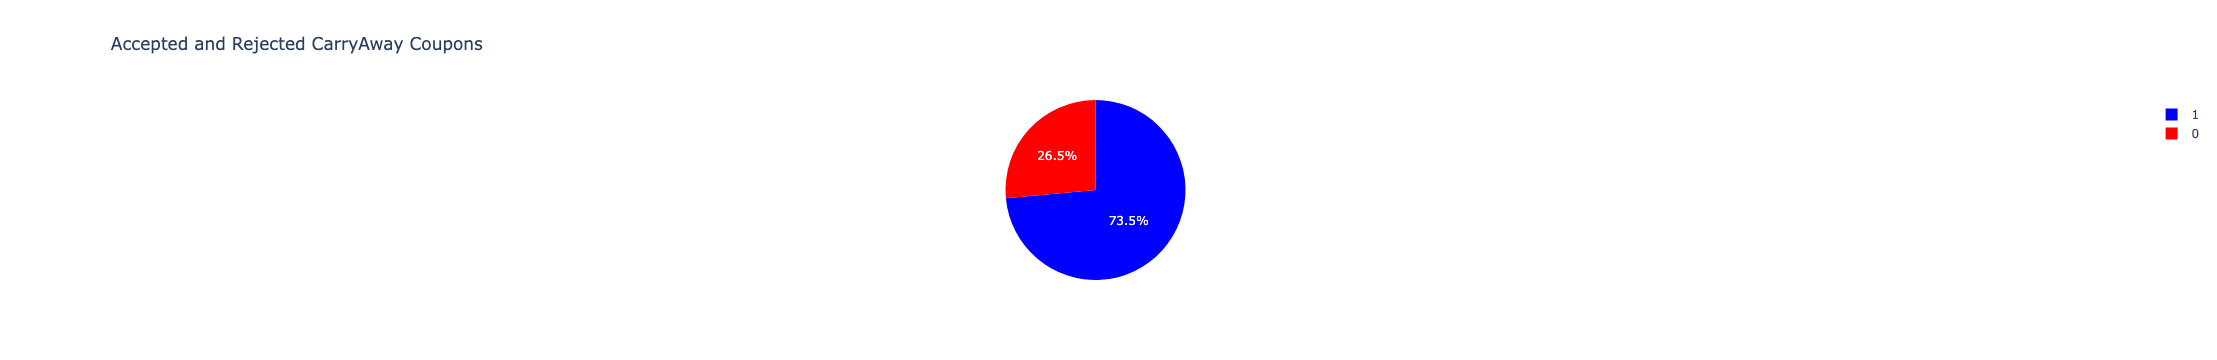

In [31]:
carryaway_coupons_total_accepted_count = carryaway_coupons['coupon_accepted'].value_counts()[1]
carryaway_coupons_total_count = carryaway_coupons['coupon_accepted'].count()
color_map = {
    0: 'red',
    1: 'blue'
}
print(f"Total accepted: {carryaway_coupons_total_accepted_count}")
print(f"Total count: {carryaway_coupons_total_count}")
print(f"Proportion of total CarryAway coupons that were accepted: {carryaway_coupons_total_accepted_count/carryaway_coupons_total_count}")
fig = px.pie(
    carryaway_coupons,
    names='coupon_accepted',
    title='Accepted and Rejected CarryAway Coupons',
    color='coupon_accepted',
    color_discrete_map=color_map
)
fig.write_html("plots/accepted_rejected_carryaway_coupons_proportion.html")
fig.show()

In [32]:
restaurant_20_50_coupons = data[data['coupon'] == 'Restaurant(20-50)']
restaurant_20_50_coupons.head()

destination passanger weather  temperature time             coupon  \
14        Home     Alone   Sunny           55  6PM  Restaurant(20-50)   
18        Work     Alone   Sunny           80  7AM  Restaurant(20-50)   
36        Home     Alone   Sunny           55  6PM  Restaurant(20-50)   
40        Work     Alone   Sunny           80  7AM  Restaurant(20-50)   
58        Home     Alone   Sunny           55  6PM  Restaurant(20-50)   

   expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
14         1d  Female  21  Unmarried partner  ...        never       1~3   
18         1d  Female  21  Unmarried partner  ...        never       1~3   
36         1d    Male  21             Single  ...        less1       4~8   
40         1d    Male  21             Single  ...        less1       4~8   
58         1d    Male  46             Single  ...          4~8       1~3   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
14                  4~8              1~3                1                 1   
18                  4~8              1~3                1                 1   
36                  4~8            less1                1                 1   
40                  4~8            less1                1                 1   
58                  1~3            never                1                 1   

   toCoupon_GEQ25min direction_same direction_opp  coupon_accepted  
14                 0              0             1                1  
18                 0              0             1                1  
36                 0              0             1                0  
40                 0              0             1                0  
58                 0              0             1                0  

[5 rows x 25 columns]

Total accepted: 658
Total count: 1492
Proportion of total Restaurant 20-50 coupons that were accepted: 0.4410187667560322


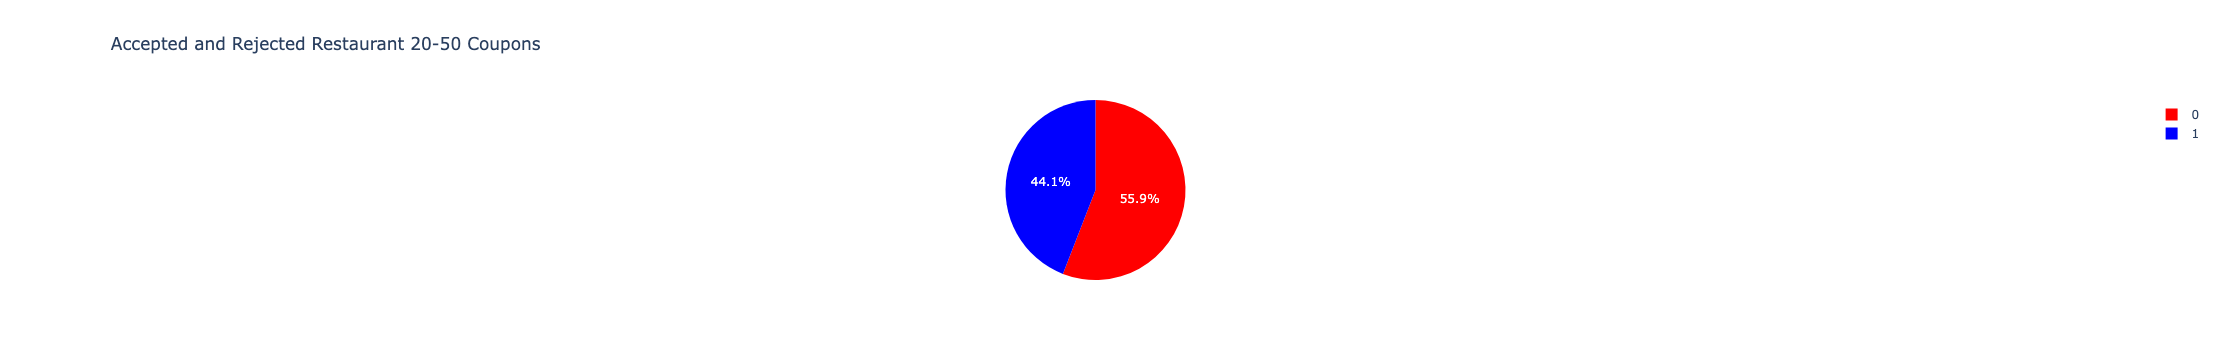

In [33]:
restaurant_20_50_coupons_total_accepted_count = restaurant_20_50_coupons['coupon_accepted'].value_counts()[1]
restaurant_20_50_coupons_total_count = restaurant_20_50_coupons['coupon_accepted'].count()
color_map = {
    0: 'red',
    1: 'blue'
}
print(f"Total accepted: {restaurant_20_50_coupons_total_accepted_count}")
print(f"Total count: {restaurant_20_50_coupons_total_count}")
print(f"Proportion of total Restaurant 20-50 coupons that were accepted: {restaurant_20_50_coupons_total_accepted_count/restaurant_20_50_coupons_total_count}")
fig = px.pie(
    restaurant_20_50_coupons,
    names='coupon_accepted',
    title='Accepted and Rejected Restaurant 20-50 Coupons',
    color='coupon_accepted',
    color_discrete_map=color_map
)
fig.write_html("plots/accepted_rejected_restaurant_20_50_coupons_proportion.html")
fig.show()

**Findings for Carry out & Take away and Restaurant(20-50) coupon groups:**
There is higher tendency for accepting coupons in both coupon categories. It is considerably more in case of Carry out & Take away coupons. It is more likely that drivers are picking up on the way back to their home.

# Encode values and identify correlations

Lets start by defining encodings

In [34]:
destination_map = {
    'No Urgent Place': 0,
    'Home': 1,
    'Work': 2
}

passanger_map = {
    'Alone': 0,
    'Friend(s)': 1,
    'Kid(s)': 2,
    'Partner': 3
}

weather_map = {
    'Sunny': 0,
    'Rainy': 1,
    'Snowy': 2
}

time_map = {
    '7AM': 0,
    '10AM': 1,
    '2PM': 2,
    '6PM': 3,
    '10PM': 4
}

coupon_map = {
    'Restaurant(<20)': 0,
    'Coffee House': 1,
    'Carry out & Take away': 2,
    'Bar': 3,
    'Restaurant(20-50)': 4
}

expiration_map = {
    '2h': 0,
    '1d': 1
}

gender_map = {
    'Female': 0,
    'Male': 1
}

age_map = {
    'below21': 0,
    '21': 1,
    '26': 2,
    '31': 3,
    '36': 4,
    '41': 5,
    '46': 6,
    '50plus': 7
}

marital_status_map = {
    'Single': 0,
    'Married partner': 1,
    'Unmarried partner': 2,
    'Divorced': 3,
    'Widowed': 4
}

education_map = {
    'Some High School': 0,
    'High School Graduate': 1,
    'Some college - no degree': 2,
    'Associates degree': 3,
    'Bachelors degree': 4,
    'Graduate degree (Masters or Doctorate)': 5
}

occupation_map = {
    'Unemployed': 0,
    'Architecture & Engineering': 1,
    'Student': 2,
    'Education&Training&Library': 3,
    'Healthcare Support': 4,
    'Healthcare Practitioners & Technical': 5,
    'Sales & Related': 6,
    'Management': 7,
    'Arts Design Entertainment Sports & Media': 8,
    'Computer & Mathematical': 9,
    'Life Physical Social Science': 10,
    'Personal Care & Service': 11,
    'Community & Social Services': 12,
    'Office & Administrative Support': 13,
    'Construction & Extraction': 14,
    'Legal': 15,
    'Retired': 16,
    'Installation Maintenance & Repair': 17,
    'Transportation & Material Moving': 18,
    'Business & Financial': 19,
    'Protective Service': 20,
    'Food Preparation & Serving Related': 21,
    'Production Occupations': 22,
    'Building & Grounds Cleaning & Maintenance': 23,
    'Farming Fishing & Forestry': 24
}

income_map = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

frequency_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}

Populate new columns into `data` dataframe that contain encoded values for category attributes.

In [35]:
data['destination_encoded'] = data['destination'].map(destination_map)
data['passanger_encoded'] = data['passanger'].map(passanger_map)
data['weather_encoded'] = data['weather'].map(weather_map)
data['time_encoded'] = data['time'].map(time_map)
data['coupon_encoded'] = data['coupon'].map(coupon_map)
data['expiration_encoded'] = data['expiration'].map(expiration_map)
data['gender_encoded'] = data['gender'].map(gender_map)
data['age_encoded'] = data['age'].map(age_map)
data['maritalStatus_encoded'] = data['maritalStatus'].map(marital_status_map)
data['education_encoded'] = data['education'].map(education_map)
data['occupation_encoded'] = data['occupation'].map(occupation_map)
data['income_encoded'] = data['income'].map(income_map)
data['Bar_encoded'] = data['Bar'].map(frequency_map)
data['RestaurantLessThan20_encoded'] = data['RestaurantLessThan20'].map(frequency_map)
data['Restaurant20To50_encoded'] = data['Restaurant20To50'].map(frequency_map)
data['CoffeeHouse_encoded'] = data['CoffeeHouse'].map(frequency_map)
data['CarryAway_encoded'] = data['CarryAway'].map(frequency_map)

Create a dataframe with numeric fields and identify correlation

In [36]:
numerical_data_frame_cols = ['destination_encoded', 'passanger_encoded', 'weather_encoded', 'time_encoded', 'coupon_encoded', 'expiration_encoded', 'gender_encoded', 'age_encoded',
                             'maritalStatus_encoded', 'education_encoded', 'occupation_encoded', 'income_encoded', 'Bar_encoded', 'RestaurantLessThan20_encoded', 'Restaurant20To50_encoded',
                             'CoffeeHouse_encoded', 'CarryAway_encoded', 'coupon_accepted']

In [37]:
numerical_data_frame = data[numerical_data_frame_cols]

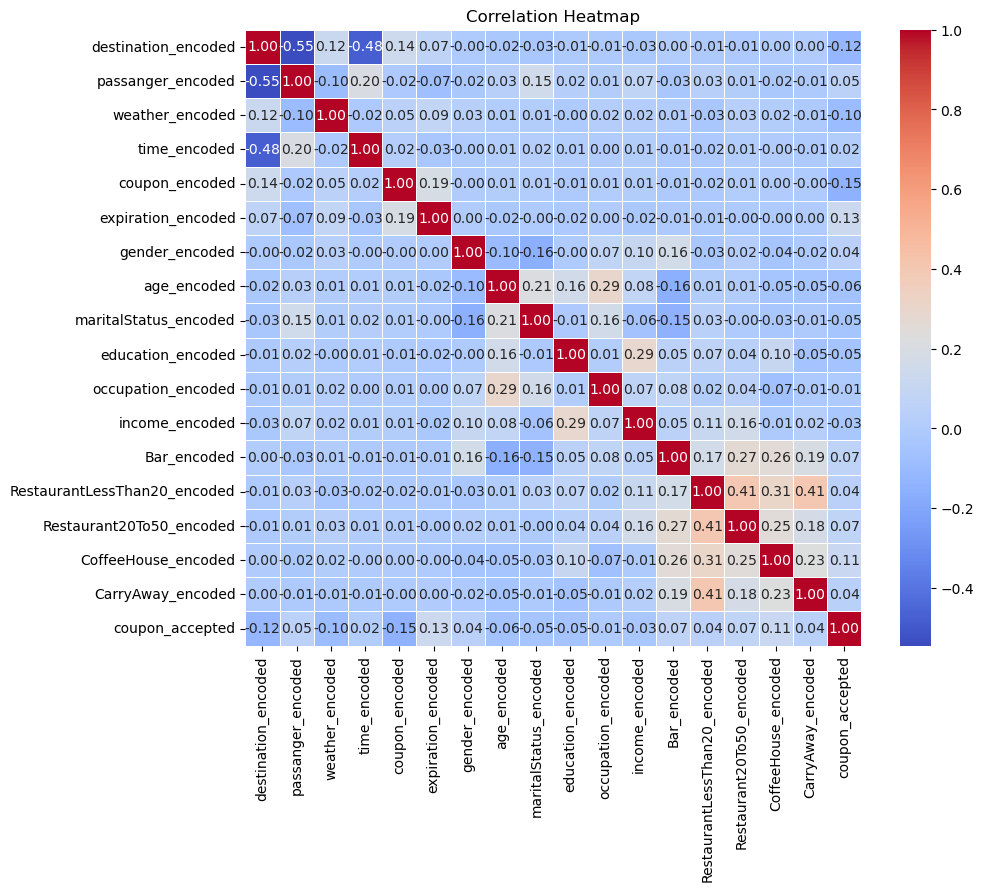

In [38]:
corr = numerical_data_frame.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('images/correlation_heatmap.png')
plt.show()

**Findings**
1. The correlation map doesn't show strong correlation between `coupon_accepted` (originally `Y`) column and any other encoded column values.
2. There are a few correlations that are between `destination_encoded`-`passanger_encoded`, `destination_encoded`-`time_encoded` that can be investigated further.